# Welcome to the Perfect Vacation project analysis

### By Israel Sinke and Lior Lakay - Holon Institute of Technology

<img src="vacation-vibes.jpg" alt="Drawing" style="width: 700px;"/>

# Backround
### As we both people who love to travel, we encounter the ultimate question in each of our trips - **where is the best place to stay in during our trip?**

### In this project we will try to answer this question 

## Our machine learning question will be:
#### **Can we predicting the rate of rental apartment depends on specific apartment's attributes**

### Let's start checking it...

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# TODO: check what modules needed and insert here

#### First, we will load our dataset that we have acquired using our crawler into pandas dataframe:

In [204]:
apartments_data = pd.read_csv('data_output.csv')

#### This is how it looks like before we start working on it:

In [205]:
apartments_data

,Unnamed: 0,Location,Name,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
0,0,Glendale,Room in Glendale,1,2,False,True,True,True,True,True,True,True,True,True,True,False,322,5,5.00
1,1,Redondo Beach,Home in Redondo Beach,1,2,True,True,True,True,True,NaN,NaN,True,True,True,True,False,610,3,4.67
2,2,Los Angeles,Guesthouse in Los Angeles,1,2,False,True,True,True,True,NaN,True,True,True,True,NaN,True,912,249,4.97
3,3,Inglewood,Boutique hotel in Inglewood,1,2,False,True,True,NaN,NaN,NaN,True,True,True,True,NaN,False,453,1132,4.28
4,4,Los Angeles,Room in Los Angeles,1,1,False,True,NaN,True,True,NaN,True,True,NaN,NaN,NaN,False,310,4,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2965,San Antonio,Apartment in San Antonio,1,3,False,True,True,True,True,NaN,True,True,True,True,True,True,319,334,4.85
2966,2966,San Antonio,Tiny home in San Antonio,1,2,True,True,True,True,True,NaN,True,True,True,True,NaN,False,196,5,4.60
2967,2967,San Antonio,Apartment in San Antonio,1,4,False,True,True,True,True,NaN,True,True,True,True,True,False,372,1,5.00
2968,2968,San Antonio,Apartment in San Antonio,1,2,False,True,True,True,True,NaN,True,True,True,True,True,True,319,74,4.81


#### And this is the dataframe shape:

In [206]:
apartments_data.shape

(2970, 20)

#### Let's check how much missing values we have

In [207]:
apartments_data.isnull().sum()

Unnamed: 0         0
Location           0
Name               0
Rooms              0
Guests             0
Pets             106
Wifi              46
Free_parking     590
Refrigerator     455
Kitchen          461
Smoke_alarm     2280
Cooling          410
Heating          307
TV               498
Bed_lines        777
Washer          1000
Super_host         0
Price              0
Review_count       0
Total_rate         0
dtype: int64

#### First, we will fill the missing values

In [208]:
apartments_data['Pets'] = apartments_data['Pets'].fillna(method='bfill')

#### And for the rest columns, we know that missing values indicates that those features is not include in the apartment, i.e. its False

In [209]:
apartments_data[
    [
        'Wifi',
        'Free_parking',
        'Refrigerator',
        'Kitchen',
        'Smoke_alarm',
        'Cooling',
        'Heating',
        'TV',
        'Bed_lines',
        'Washer'
    ]
] = apartments_data[
    [
        'Wifi',
        'Free_parking',
        'Refrigerator',
        'Kitchen',
        'Smoke_alarm',
        'Cooling',
        'Heating',
        'TV',
        'Bed_lines',
        'Washer'
    ]
].fillna(False)

In [210]:
apartments_data.isnull().sum()

Unnamed: 0      0
Location        0
Name            0
Rooms           0
Guests          0
Pets            0
Wifi            0
Free_parking    0
Refrigerator    0
Kitchen         0
Smoke_alarm     0
Cooling         0
Heating         0
TV              0
Bed_lines       0
Washer          0
Super_host      0
Price           0
Review_count    0
Total_rate      0
dtype: int64

# Data Cleanup

### We've mapped every "Categorial" value to numeric representation 

In [211]:
categorial_values = {True: 1, False: 0}
apartments_data.Pets.replace(categorial_values, inplace=True)
apartments_data.Wifi.replace(categorial_values, inplace=True)
apartments_data.Free_parking.replace(categorial_values, inplace=True)
apartments_data.Refrigerator.replace(categorial_values, inplace=True)
apartments_data.Kitchen.replace(categorial_values, inplace=True)
apartments_data.Smoke_alarm.replace(categorial_values, inplace=True)
apartments_data.Cooling.replace(categorial_values, inplace=True)
apartments_data.Heating.replace(categorial_values, inplace=True)
apartments_data.TV.replace(categorial_values, inplace=True)
apartments_data.Bed_lines.replace(categorial_values, inplace=True)
apartments_data.Washer.replace(categorial_values, inplace=True)
apartments_data.Super_host.replace(categorial_values, inplace=True)


#### And we will map each location to relevant index 

In [212]:
for index, i in enumerate(range(1,12)):
    if index == 0:
        apartments_data.loc[:269, 'Location'] = i
        continue
    
    start = (i - 1) * 270  
    end = i * 269 + (i - 1)
    apartments_data.loc[start :end, 'Location'] = i

#### The numbers 1-11 represent the following cities:
+ Los Angles: 1
+ New York City: 2
+ Miami: 3
+ Chicago: 4
+ Wasington DC: 5
+ Boston: 6
+ Baltimore: 7
+ San Francisco: 8
+ Seattle: 9
+ Phonex: 10
+ San Antonio: 11

In [213]:
apartments_data.head()

,Unnamed: 0,Location,Name,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
0,0,1,Room in Glendale,1,2,0,1,1,1,1,1,1,1,1,1,1,0,322,5,5.00
1,1,1,Home in Redondo Beach,1,2,1,1,1,1,1,0,0,1,1,1,1,0,610,3,4.67
2,2,1,Guesthouse in Los Angeles,1,2,0,1,1,1,1,0,1,1,1,1,0,1,912,249,4.97
3,3,1,Boutique hotel in Inglewood,1,2,0,1,1,0,0,0,1,1,1,1,0,0,453,1132,4.28
4,4,1,Room in Los Angeles,1,1,0,1,0,1,1,0,1,1,0,0,0,0,310,4,5.00


#### Now we will filter the apartments which their review count is less than 12 people, for preventing biased data

In [214]:
apartments_data = apartments_data[apartments_data['Review_count'] > 12]
apartments_data.head()

,Unnamed: 0,Location,Name,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
2,2,1,Guesthouse in Los Angeles,1,2,0,1,1,1,1,0,1,1,1,1,0,1,912,249,4.97
3,3,1,Boutique hotel in Inglewood,1,2,0,1,1,0,0,0,1,1,1,1,0,0,453,1132,4.28
5,5,1,Apartment in Los Angeles,1,2,0,1,0,1,1,0,1,1,1,1,1,1,825,135,4.95
6,6,1,Guest suite in Glendale,1,1,0,1,1,1,1,0,1,1,1,0,0,1,503,100,4.98
8,8,1,Place to stay in Pasadena,1,1,0,1,1,1,1,0,1,1,0,0,1,0,198,117,4.70


#### And we will drop the unrelevant columns

In [215]:
apartments_data = apartments_data.drop('Name', axis=1) # Getting rid of 'Names' column
apartments_data = apartments_data.iloc[:, 1:] # Getting rid of first column

apartments_data.head()

,Location,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
2,1,1,2,0,1,1,1,1,0,1,1,1,1,0,1,912,249,4.97
3,1,1,2,0,1,1,0,0,0,1,1,1,1,0,0,453,1132,4.28
5,1,1,2,0,1,0,1,1,0,1,1,1,1,1,1,825,135,4.95
6,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,503,100,4.98
8,1,1,1,0,1,1,1,1,0,1,1,0,0,1,0,198,117,4.70


In [216]:
apartments_data.shape

(2038, 18)

In [217]:
apartments_data.duplicated().sum()

1809

In [218]:
apartments_data.drop_duplicates()

(2038, 18)

c:\Users\liorl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

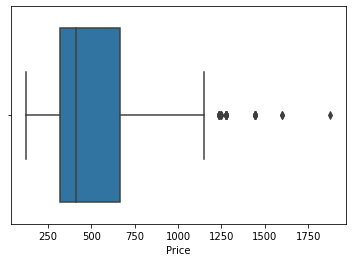

In [219]:
sns.boxplot(apartments_data.Price)

#### As we can see, the most common prices for rental apartment is moving between 250-750 NIS

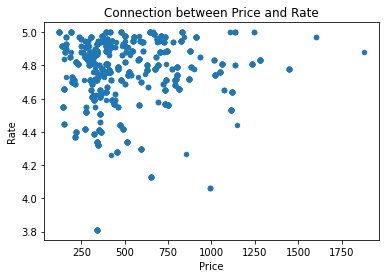

In [239]:
apartments_data.plot.scatter(x='Price', y='Total_rate')
plt.xlabel('Price')
plt.ylabel('Rate')
plt.title('Connection between Price and Rate')

plt.show()

<BarContainer object of 2038 artists>

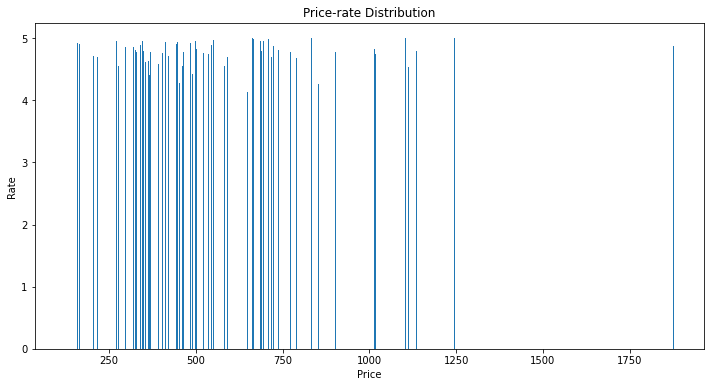

In [225]:
plt.figure(figsize=(12,6))
plt.title("Price-rate Distribution")
plt.xlabel("Price")
plt.ylabel("Rate")
# plt.hist(apartments_data.Total_rate, bins=np.arange(10,80,2),color='orange',edgecolor='white')
plt.bar(apartments_data.Price, apartments_data.Total_rate)

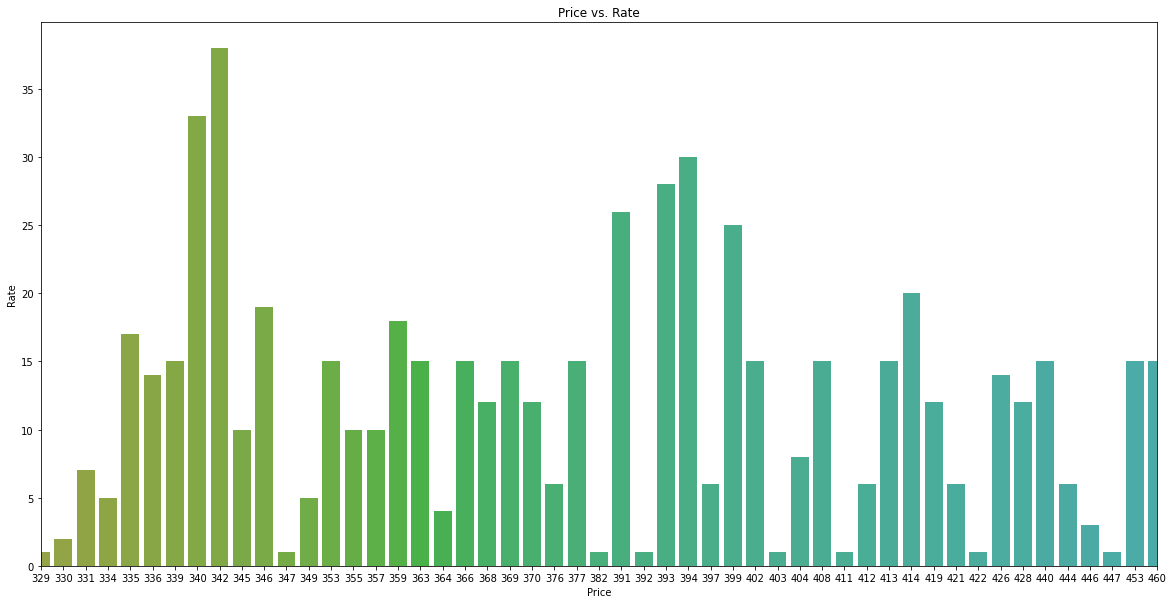

In [233]:
plt.figure(figsize=(20, 10))
rate=apartments_data.groupby('Price')['Total_rate'].count().reset_index()
sns.barplot(x='Price',y='Total_rate',data=rate)
plt.title('Price vs. Rate')
plt.xlim(50,100)
plt.xlabel('Price')
plt.ylabel('Rate')
plt.show()